# Author = Anshika Pandey
# Task 2 Prediction using Unsupervised ML
**Problem Statement : From the given ‘Iris’ dataset, predict the optimum number of clusters
and represent it visually.**

# Importing the libraries

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn import datasets
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from scipy.cluster.hierarchy import linkage, dendrogram, cut_tree

# Load the iris dataset

In [2]:
df = datasets.load_iris()
df = pd.DataFrame(df.data, columns = df.feature_names)
df.head() 

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


# To know number of rows and collumns

In [3]:
df.shape

(150, 4)

# To find if any null value is present

In [4]:
df.isnull().sum()

sepal length (cm)    0
sepal width (cm)     0
petal length (cm)    0
petal width (cm)     0
dtype: int64

# To see summary statistics

In [5]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
sepal length (cm),150.0,5.843333,0.828066,4.3,5.1,5.80,6.4,7.9
sepal width (cm),150.0,3.057333,0.435866,2.0,2.8,3.00,3.3,4.4
petal length (cm),150.0,3.758000,1.765298,1.0,1.6,4.35,5.1,6.9
petal width (cm),150.0,1.199333,0.762238,0.1,0.3,1.30,1.8,2.5


# To find outliers

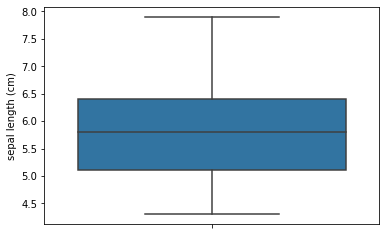

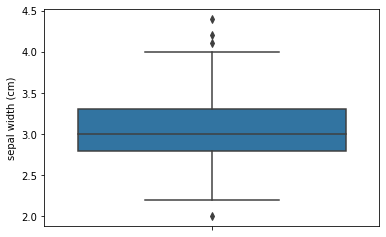

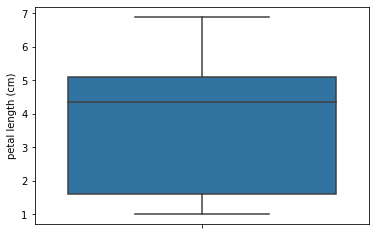

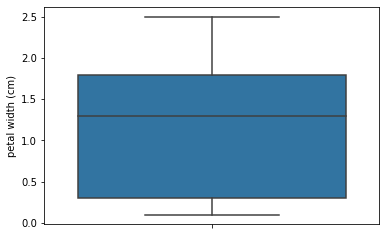

In [6]:
 cols = df.columns
for i in cols:
    sns.boxplot(y=df[i])
    plt.show()

# To remove outliers from 'sepal width (cm)'

In [7]:
q1 = df['sepal width (cm)'].quantile(0.25)
q3 = df['sepal width (cm)'].quantile(0.75)
iqr = q3 - q1
df = df[(df['sepal width (cm)'] >= q1-1.5*iqr) & (df['sepal width (cm)'] <= q3+1.5*iqr)]
df.shape

(146, 4)

# Blocplot for sepal width (cm) after outlier treatment

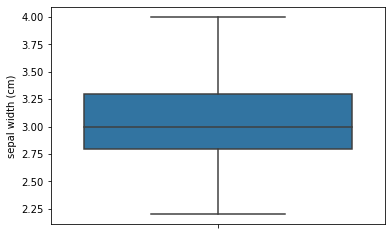

In [8]:
sns.boxplot(y=df['sepal width (cm)'])
plt.show()

# Standardizing to avoid bias

In [9]:
standard_scaler = StandardScaler()
df_norm = standard_scaler.fit_transform(df)

# To find the optimal no. of cluster

In [10]:
cluster_range = range(1,20)
cluster_errors = []

for num_cluster in cluster_range:
    clusters = KMeans(num_cluster, n_init = 10)
    clusters.fit(df_norm)
    labels = clusters.labels_
    centroids = clusters.cluster_centers_
    cluster_errors.append(clusters.inertia_)
    
clusters_df = pd.DataFrame({'num_cluster': cluster_range, 'cluster_errors': cluster_errors})
clusters_df[0:20]

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:881: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


,num_cluster,cluster_errors
0,1,584.000000
1,2,217.499302
2,3,134.347433
3,4,109.767399
4,5,88.896515
5,6,78.872055
6,7,68.958340
7,8,59.800067
8,9,53.369939
9,10,45.795495


# Ploting elbow curve or sree to find the no. of cluster

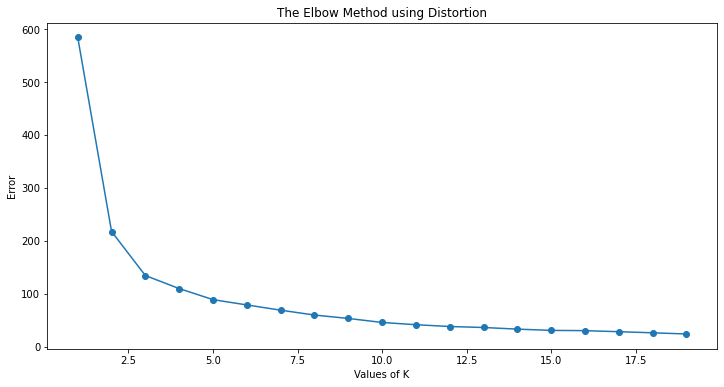

In [11]:
plt.figure(figsize=(12,6))
plt.plot(clusters_df.num_cluster, clusters_df.cluster_errors, marker = 'o') 
plt.xlabel('Values of K') 
plt.ylabel('Error') 
plt.title('The Elbow Method using Distortion') 
plt.show()

# Creating object of the model and fitting it

In [12]:
model = KMeans(n_clusters=3, max_iter=50)
model.fit(df)

KMeans(max_iter=50, n_clusters=3)

# analysis of cluster found

In [13]:
df.index = pd.RangeIndex(len(df.index))
df_km = pd.concat([df, pd.Series(model.labels_)], axis=1)
df_km.columns = ['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)', 'ClusterID']

km_clusters_Slength = pd.DataFrame(df_km.groupby(['ClusterID']).agg({'sepal length (cm)':'mean'}))
km_clusters_Swidth = pd.DataFrame(df_km.groupby(['ClusterID']).agg({'sepal width (cm)':'mean'}))
km_clusters_Plength = pd.DataFrame(df_km.groupby(['ClusterID']).agg({'petal length (cm)':'mean'}))
km_clusters_Pwidth = pd.DataFrame(df_km.groupby(['ClusterID']).agg({'petal width (cm)':'mean'}))

In [14]:
df2 = pd.concat([pd.Series([0,1,2]), km_clusters_Slength, km_clusters_Swidth, km_clusters_Plength, km_clusters_Pwidth
                ], axis=1)
df2.columns = ['ClusterID','sepal length (cm)_mean','sepal width (cm)_mean','petal length (cm)_mean',
               'petal width (cm)_mean']
df2.head()

,ClusterID,sepal length (cm)_mean,sepal width (cm)_mean,petal length (cm)_mean,petal width (cm)_mean
0,0,4.976596,3.376596,1.461702,0.246809
1,1,6.850000,3.073684,5.742105,2.071053
2,2,5.916393,2.760656,4.408197,1.440984


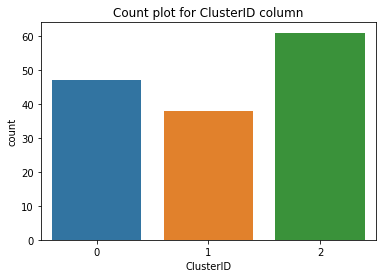

In [15]:
sns.countplot(x=df_km.ClusterID)
plt.title('Count plot for ClusterID column')
plt.show()

# heirarchical clustering with full dendrogram

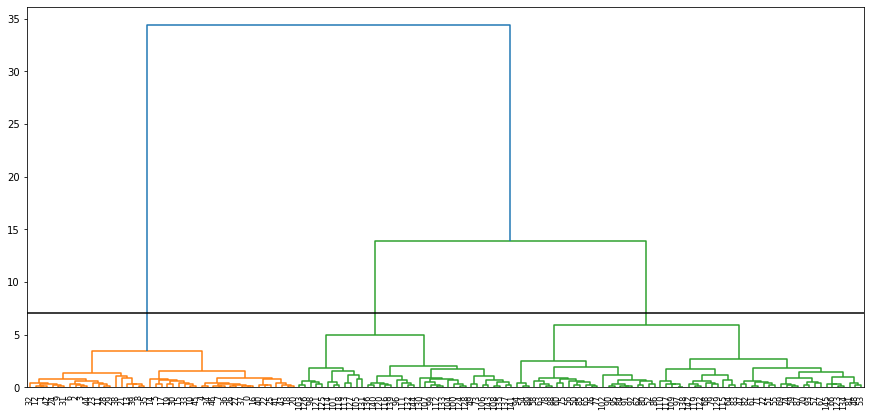

In [16]:
plt.figure(figsize=(15,7))
mergings = linkage(df_km, method = 'ward', metric='euclidean')

# set cut-off to 50
max_d = 7.08                
dendrogram(mergings,
           truncate_mode='lastp',  
           p=150,                  
           leaf_rotation=90.,      
           leaf_font_size=8.,      
          )

plt.axhline(y=max_d, c='k')
plt.show()

# heirarchical clustering with full dendrogram for 50

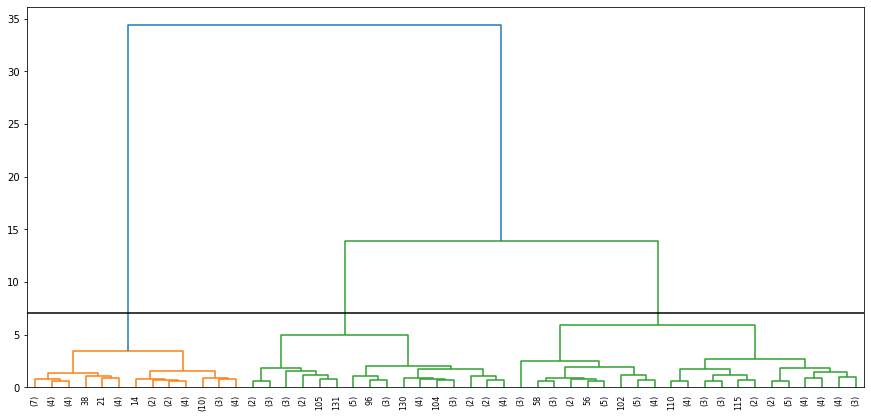

In [17]:
plt.figure(figsize=(15,7))
mergings = linkage(df_km, method = 'ward', metric='euclidean')
max_d = 7.08               
dendrogram(mergings,
           truncate_mode='lastp',  
           p=50,                  
           leaf_rotation=90.,     
           leaf_font_size=8.,  
          )

plt.axhline(y=max_d, c='k')
plt.show()

# Scatter plot to visualize the clusters

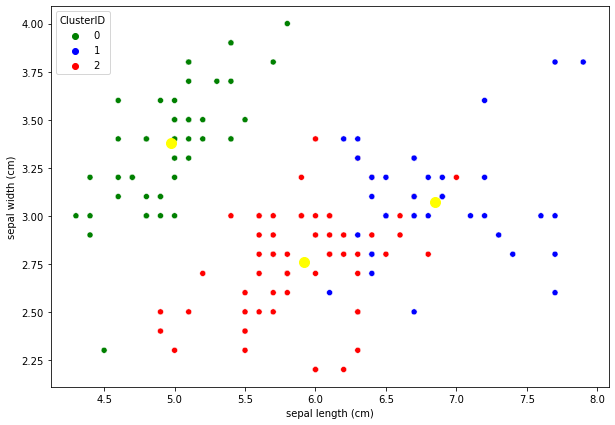

In [20]:
plt.figure(figsize=(10,7))
sns.scatterplot(x='sepal length (cm)',y='sepal width (cm)', data=df_km, hue='ClusterID', palette=['green','blue','red'])

# Plotting the centroids of the clusters
plt.scatter(model.cluster_centers_[:, 0], model.cluster_centers_[:,1], 
            s = 100, c = 'yellow', label = 'Centroids')
plt.show()

# Thank you.